
# 1) Data Preprocessing

In [ ]:
# complete all import
import numpy
import pandas
import matplotlib.pyplot as plot

In [ ]:
# pandas library used to read data's from library
# read csv file with pandas library
dataFrame = pandas.read_csv("spam.tsv", sep = "\t")

In [ ]:
# display the read data from front side
dataFrame.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
# displaying some basic analysis of the read data
# each data field will return true or false depending upon data field is empty or not
# if data is missing from data field, it will return true
# if data is available in the data field, it will return false
# I know it is super confusing, at first glance I thought exact opposite of this logic
dataFrame.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [ ]:
# following code will return total count of
# how many missing data fields present in the data set
dataFrame.isna().sum()

,0
label,0
message,0
length,0
punct,0


In [ ]:
# display the read data from back side
dataFrame.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
# for statistical analysis
# statistical analysis return for numerical columns only
dataFrame.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
# data set label grouping
dataFrame["label"].value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
# data set label grouping ratios compared to total data set size
dataFrame["label"].value_counts() / len(dataFrame)

,count
label,
ham,0.865937
spam,0.134063


In [ ]:
# data set label grouping ratios in percentage compared to total data set size
(dataFrame["label"].value_counts() / len(dataFrame)) * 100

,count
label,
ham,86.593683
spam,13.406317


In [ ]:
# filtering the data set by ham(not spam) label
# storing it another variable for reuse
notSpam = dataFrame[dataFrame["label"] == "ham"]

In [ ]:
# filtering the data set by spam label
# storing it another variable for reuse
spam = dataFrame[dataFrame["label"] == "spam"]

In [ ]:
# comparing the size of both label
# this is visualize comparison
# displaying both label size side by side
notSpam.shape, spam.shape

((4825, 4), (747, 4))

In [ ]:
# randomly selecting data's from spam data set
# in order to make both label data set ratios 50 / 50
# here passing spam size inside sample api of notSpam variable
notSpam = notSpam.sample(spam.shape[0])

In [ ]:
# comparing the size of both label
# this is visualize comparison
# displaying both label size side by side
notSpam.shape, spam.shape

# now both should be equal

((747, 4), (747, 4))

In [ ]:
# now append both spam and not spam data in a single data set

processedData = pandas.concat([notSpam, spam], ignore_index = True)

In [ ]:
# display the size of merged data set
processedData.shape

(1494, 4)

In [ ]:
# data set label grouping
processedData["label"].value_counts()

# now both label count will be equal

,count
label,
ham,747
spam,747


In [ ]:
# data set label grouping ratios in percentage compared to total data set size
(processedData["label"].value_counts() / len(processedData)) * 100

# now both label count will be equal

,count
label,
ham,50.0
spam,50.0


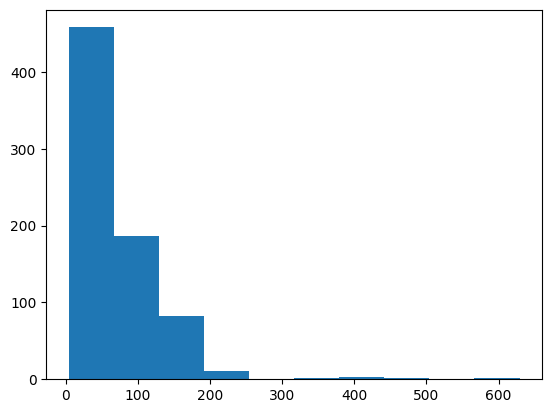

In [ ]:
# creating histogram only for not spam(ham label)
# histogram will only based on one column length
plot.hist(processedData[processedData["label"] == "ham"]["length"])
plot.show()

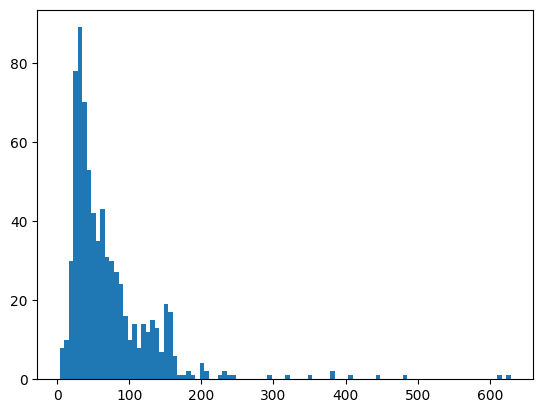

In [ ]:
# let's increase the bin size and plot again

# creating histogram only for not spam(ham label)
# histogram will only based on one column length
plot.hist(processedData[processedData["label"] == "ham"]["length"], bins = 100)
plot.show()

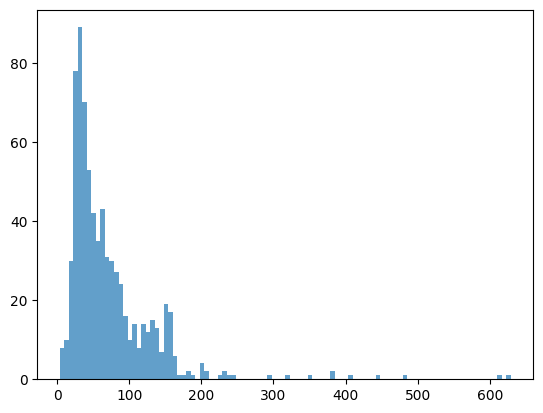

In [ ]:
# now adding the alpha parameter

# let's increase the bin size and plot again

# creating histogram only for not spam(ham label)
# histogram will only based on one column length
plot.hist(processedData[processedData["label"] == "ham"]["length"], bins = 100, alpha = 0.7)
plot.show()

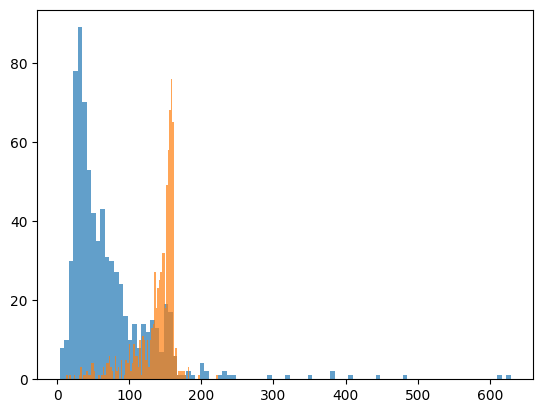

In [ ]:
# creating histogram for both not spam(ham label) and spam label
# histogram will only based on one column length
plot.hist(processedData[processedData["label"] == "ham"]["length"], bins = 100, alpha = 0.7)
plot.hist(processedData[processedData["label"] == "spam"]["length"], bins = 100, alpha = 0.7)
plot.show()

# spam message length is much bigger than not spam message

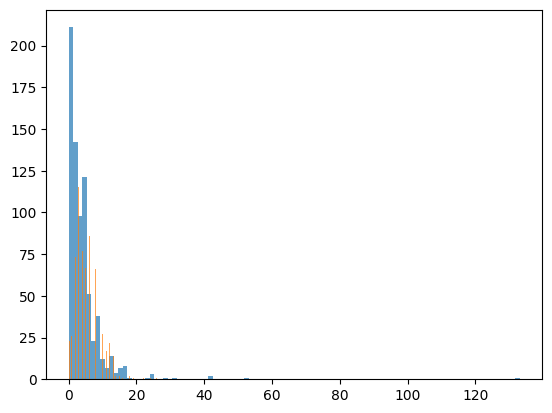

In [ ]:
# creating histogram for both not spam(ham label) and spam label
# histogram will only based on one column punctuation mark
plot.hist(processedData[processedData["label"] == "ham"]["punct"], bins = 100, alpha = 0.7)
plot.hist(processedData[processedData["label"] == "spam"]["punct"], bins = 100, alpha = 0.7)
plot.show()

# difference regarding punctuation marks is not that much great

In [ ]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# spliting train and testing data from processed data set
# ratio - train - 80, test - 20

# here
# xTrain is the message content
# yTrain is label
# like wise, xTest is message content, yTest is label
xTrain, xTest, yTrain, yTest = train_test_split(processedData["message"], processedData["label"], test_size = 0.2, random_state = 0, shuffle = True)

# during training and testing label will mapped to message content

In [ ]:
xTrain.shape, yTrain.shape

((1195,), (1195,))

In [ ]:
xTest.shape, yTest.shape

((299,), (299,))

# 2) Building the Model (Random Forest)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
# creating a pipeline object
# passing both TfidfVectorizer Object and RandomForestClassifier Object
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier())])

In [ ]:
# now train the data with random forest
classifier.fit(xTrain, yTrain)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# 3) Predicting the results (Random Forest)

In [ ]:
yRandomForestPredictions = classifier.predict(xTest)

In [ ]:
yTest, yRandomForestPredictions

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 621      ham
 140      ham
 1433    spam
 693      ham
 39       ham
 Name: label, Length: 299, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'

In [ ]:
# for calculating accuracy of model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# now display the accuracy score of your model for 80/20 ratio
accuracy_score(yTest, yRandomForestPredictions)

0.959866220735786

In [ ]:
# now display the accuracy score of your model for 80/20 ratio
# display in percentage
accuracy_score(yTest, yRandomForestPredictions) * 100

95.9866220735786

In [ ]:
confusion_matrix(yTest, yRandomForestPredictions)

array([[150,   1],
       [ 11, 137]])

In [ ]:
print(classification_report(yTest, yRandomForestPredictions))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       151
        spam       0.99      0.93      0.96       148

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



# 4) Building the Model (Support Vector Machine (SVM))

In [ ]:
from sklearn.svm import SVC

In [ ]:
# creating a pipeline object
# passing both TfidfVectorizer Object and SVC Object
SVMClassifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", SVC())])

In [ ]:
SVMClassifier.fit(xTrain, yTrain)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', SVC())])

# 5) Predicting the results (Support Vector Machine (SVM))

In [ ]:
ySVMPredictions = SVMClassifier.predict(xTest)

In [ ]:
# now display the accuracy score of your model for 80/20 ratio
accuracy_score(yTest, ySVMPredictions)

0.9632107023411371

In [ ]:
confusion_matrix(yTest, ySVMPredictions)

array([[148,   3],
       [  8, 140]])

In [ ]:
print(classification_report(yTest, ySVMPredictions))

              precision    recall  f1-score   support

         ham       0.95      0.98      0.96       151
        spam       0.98      0.95      0.96       148

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



# 6) Predicing the result with example

In [ ]:
messageOne = "Hello, You are learning natural Language Processing"
messageTwo = "Hope you are doing good and learning new things !"
messageThree = "Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677"

## Random Forest Predictions

In [ ]:
classifier.predict([messageOne])

array(['ham'], dtype=object)

In [ ]:
classifier.predict([messageTwo])

array(['ham'], dtype=object)

In [ ]:
classifier.predict([messageThree])

array(['spam'], dtype=object)

## SVM Predictions

In [ ]:
SVMClassifier.predict([messageOne])

array(['ham'], dtype=object)

In [ ]:
SVMClassifier.predict([messageTwo])

array(['ham'], dtype=object)

In [ ]:
SVMClassifier.predict([messageThree])

array(['spam'], dtype=object)